In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils


In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [4]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
input_shape = (28, 28, 1)

In [5]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [7]:
x_train /= 255
x_test /= 255

In [8]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [9]:
model = Sequential()

# Convnet Layer:
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Classification Layer:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [11]:
model.fit(x_train, y_train,batch_size=128,epochs=10,validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 24s 49ms/step - loss: 0.4060 - accuracy: 0.8715 - val_loss: 0.0603 - val_accuracy: 0.9811
Epoch 2/10
469/469 [==============================] - 22s 47ms/step - loss: 0.1155 - accuracy: 0.9693 - val_loss: 0.0428 - val_accuracy: 0.9870
Epoch 3/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0821 - accuracy: 0.9785 - val_loss: 0.0387 - val_accuracy: 0.9892
Epoch 4/10
469/469 [==============================] - 22s 48ms/step - loss: 0.0645 - accuracy: 0.9830 - val_loss: 0.0303 - val_accuracy: 0.9913
Epoch 5/10
469/469 [==============================] - 21s 46ms/step - loss: 0.0559 - accuracy: 0.9856 - val_loss: 0.0261 - val_accuracy: 0.9926
Epoch 6/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0456 - accuracy: 0.9878 - val_loss: 0.0316 - val_accuracy: 0.9911
Epoch 7/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0433 - accuracy: 0.9894 - val_loss: 0.0310 - val_accuracy:

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.026992108672857285
Test accuracy: 0.9923999905586243


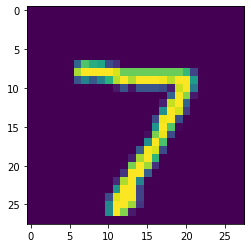

In [13]:
import matplotlib.pyplot as plt

plt.imshow(x_test[:1].reshape(28,28))
plt.show()

In [14]:
pre = model.predict(x_test[:1])

1/1 [==============================] - 0s 135ms/step


In [15]:
import numpy as np
max_index = np.argmax(pre, axis=1)

In [16]:
max_index

array([7], dtype=int64)

In [17]:
model.save('mnist.h5')
print("Saving the model as mnist.h5")

Saving the model as mnist.h5
